In [1]:
import numpy as np
import pandas as pd

#### Importing libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [3]:
import missingno

In [4]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


#### Loading data

In [7]:
train_df=pd.read_csv('train.csv')

In [9]:
test_df=pd.read_csv('test.csv')

In [10]:
gender_submission_df=pd.read_csv('gender_submission.csv')

In [11]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


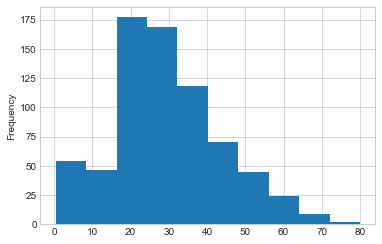

In [12]:
train_df.Age.plot.hist()

In [13]:
gender_submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [14]:
test_df.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analysis begins

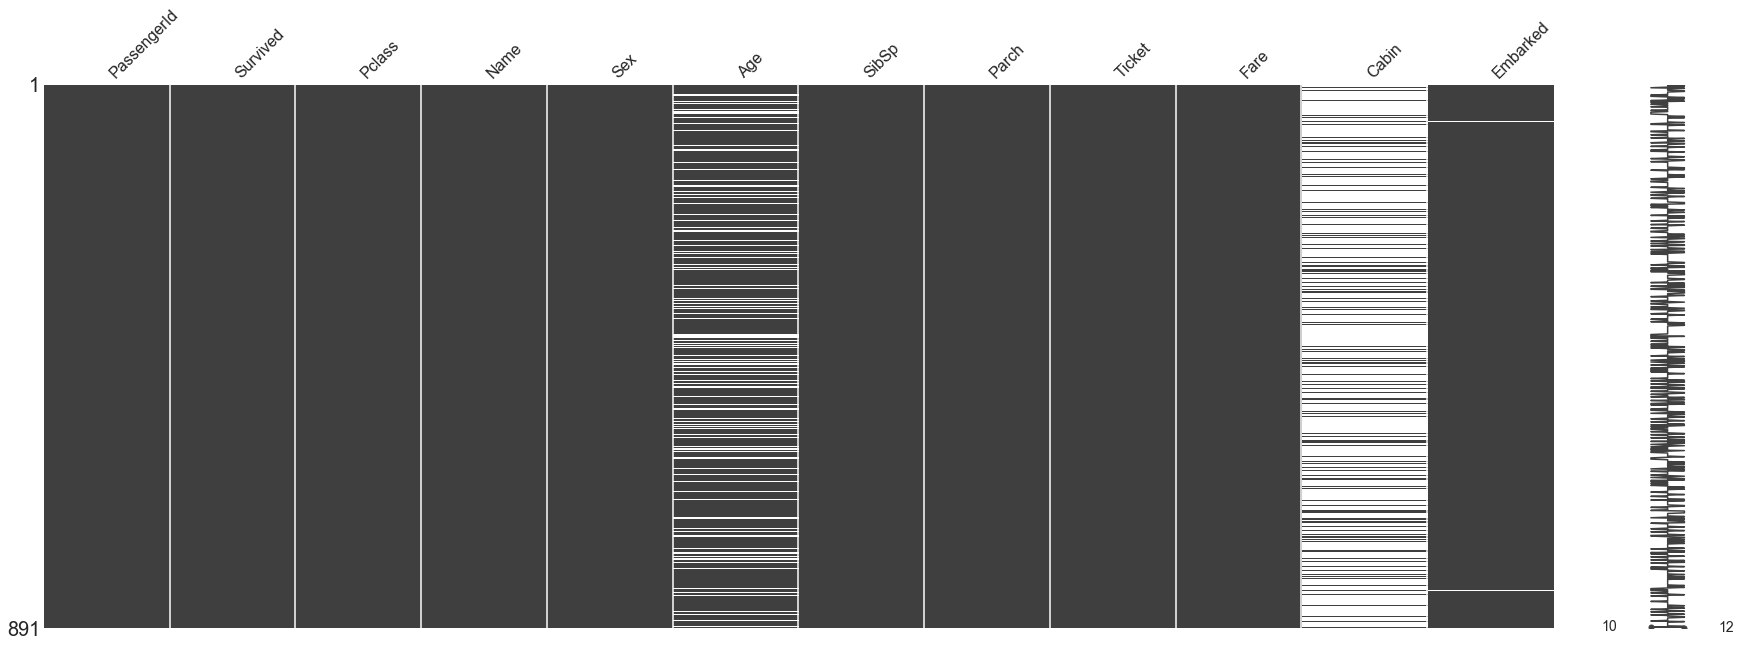

In [16]:
#plot a diagram of missing values
missingno.matrix(train_df,figsize=(30,10))

In [17]:
# Alternatively, we can see the number of missing values like this
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# there are a lot of missing values and we should handle them at an early stage.

In [21]:
# Data types 
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Now we have to separate categorical and continuous data

In [22]:
df_cat=pd.DataFrame()# for categorical data
df_con=pd.DataFrame()# for continuous data

#### Analyzing each feature separately

##### 1. Survived

In [23]:
# Survived
print(train_df.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


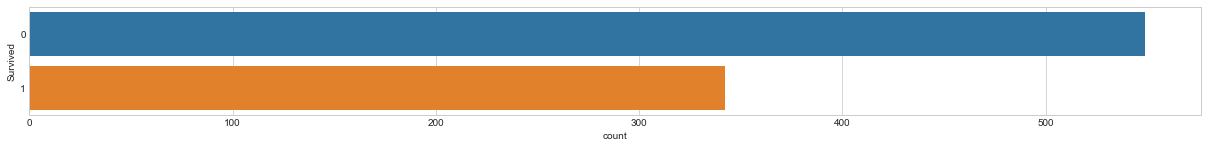

In [26]:
fig=plt.figure(figsize=(21,2))
sns.countplot(y='Survived',data=train_df)
#0 = did not survive, 1 = survived

In [28]:
df_cat['Survived'] = train_df['Survived']
df_con['Survived'] = train_df['Survived']

##### 2. Pclass

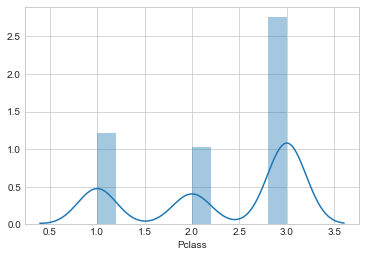

In [29]:
sns.distplot(train_df.Pclass)

In [30]:
df_cat['Pclass']=train_df['Pclass']
df_con['Pclass']=train_df['Pclass']

##### 3.Names
##### Every row has a unique name. This is equivalent to the passenger ID
##### Because of so many different names and to keep this EDA fast, we won't use the name variable.

##### 4.Sex

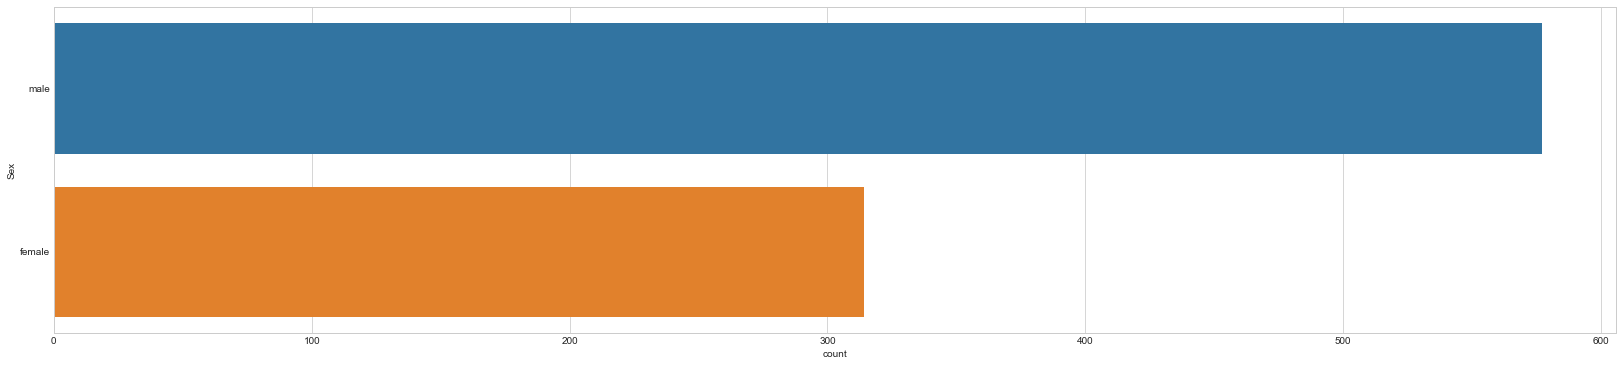

In [31]:
fig=plt.figure(figsize=(28,6))
sns.countplot(y='Sex',data=train_df)

In [32]:
# add sex to subset dataframes
df_cat['Sex']=train_df['Sex']
df_cat['Sex']=np.where(df_cat['Sex']=='female',1,0) # 1 for female 0 for male
df_con['Sex']=train_df['Sex']

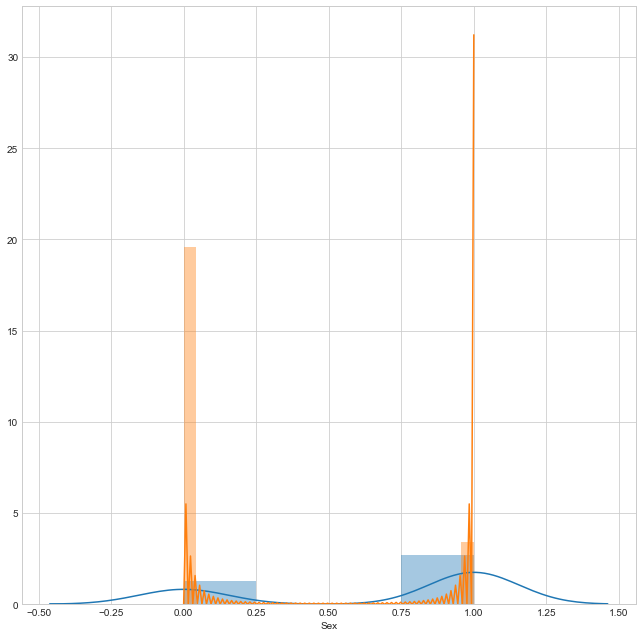

In [37]:
#An analysis when sex and age are combined to form a figure
fig=plt.figure(figsize=(11,11))
sns.distplot(df_cat[df_cat['Survived']==1]['Sex'],label='Survived')
sns.distplot(df_cat[df_cat['Survived']==0]['Sex'],label='Not Survived')

In [38]:
# from the above figure we can infer that of the very less survived people more were female

##### 5.Age

In [40]:
# we are having a lots of missing values here.
train_df.Age.isnull().sum()

177

In [41]:
# replacing missing values with mean
df_cat['Age']=train_df['Age']
df_cat['Age']=df_cat['Age'].fillna((df_cat['Age'].mean()))

In [44]:
df_cat['Age']=pd.cut(df_cat['Age'],10)
df_con['Age']=train_df['Age']

In [45]:
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',train_df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


#### Function to demonstrate count and destribution figures

In [46]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

##### 6.Sibsp

In [47]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [49]:
df_cat['SibSp'] = train_df['SibSp']
df_con['SibSp'] = train_df['SibSp']

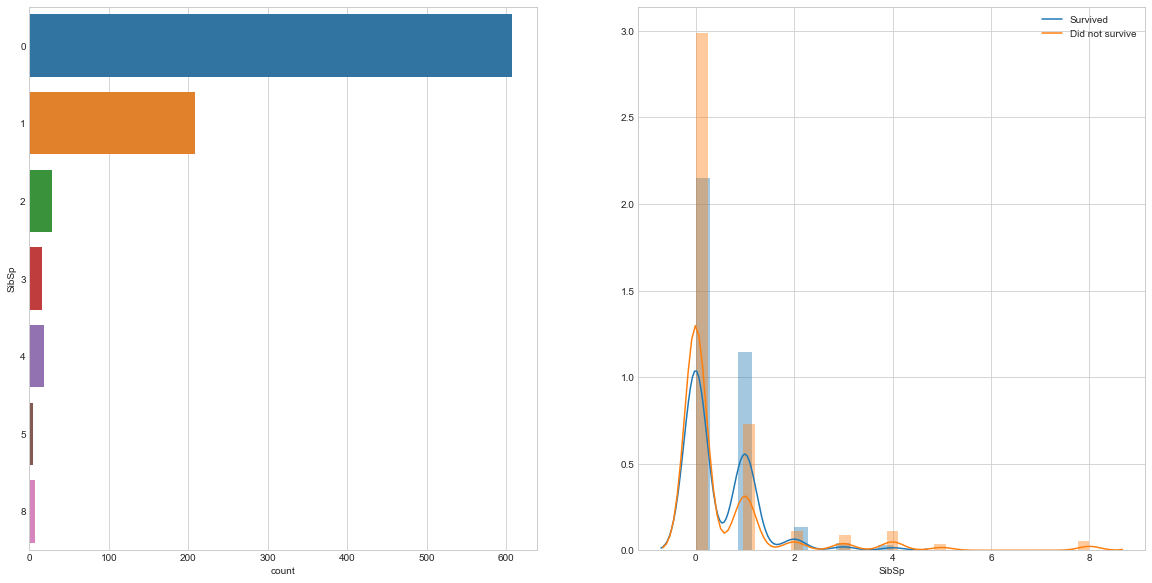

In [50]:
plot_count_dist(train_df, bin_df=df_cat, label_column='Survived', target_column='SibSp',figsize=(20, 10))

##### 7.Parch

In [51]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [53]:
df_cat['Parch'] = train_df['Parch']
df_con['Parch'] = train_df['Parch']

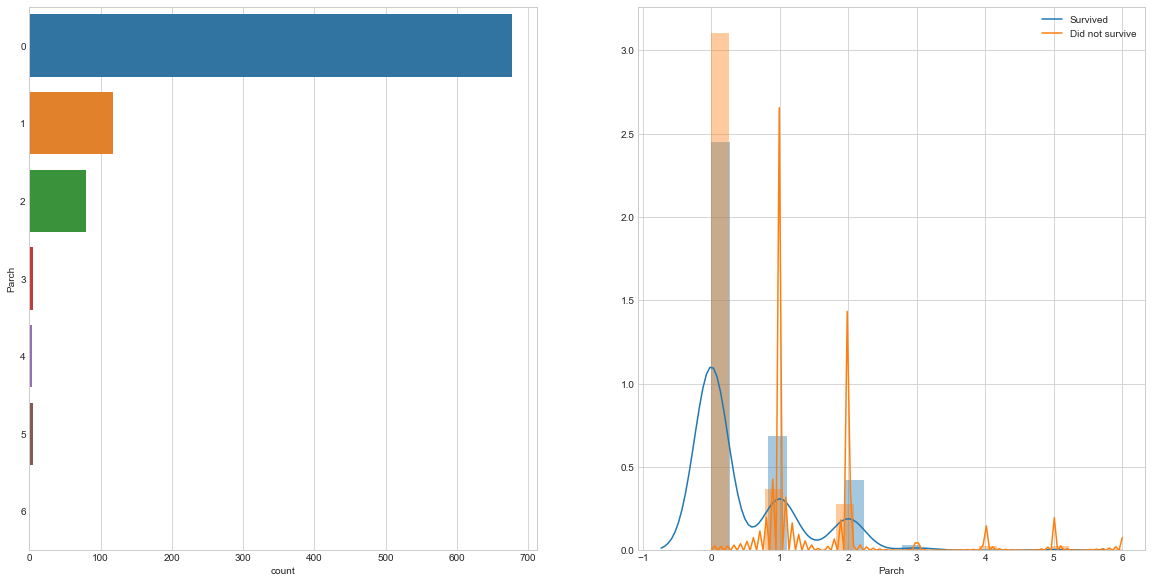

In [54]:
plot_count_dist(train_df, bin_df=df_cat,label_column='Survived', target_column='Parch', figsize=(20, 10))

##### 8.Ticket

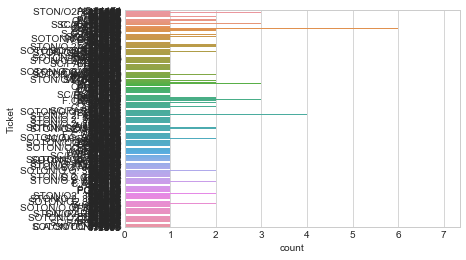

In [55]:
sns.countplot(y="Ticket", data=train_df)

In [56]:
# different types of tickets
train_df.Ticket.value_counts()

347082               7
1601                 7
CA. 2343             7
347088               6
CA 2144              6
                    ..
PC 17597             1
248698               1
SOTON/O.Q. 392078    1
STON/O 2. 3101285    1
349213               1
Name: Ticket, Length: 681, dtype: int64

In [57]:
print("{} unique Ticket values.".format(len(train_df.Ticket.unique())))

681 unique Ticket values.


In [58]:
#The ticket attribute has 681 unique values so we can't consider it 

##### 9.Fare

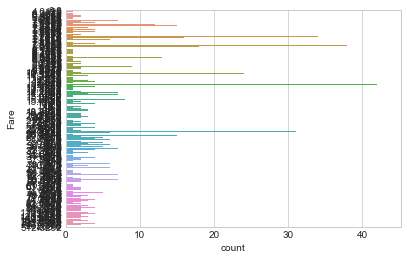

In [59]:
sns.countplot(y="Fare", data=train_df)

In [60]:
train_df.Fare.dtype

dtype('float64')

In [61]:
#Since it is a float we can add it to our sub data frames 
df_con['Fare'] = train_df['Fare'] 
df_cat['Fare'] = pd.cut(train_df['Fare'], bins=5) # discretised

In [62]:
df_cat.Fare.value_counts()
#The bins formed are

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

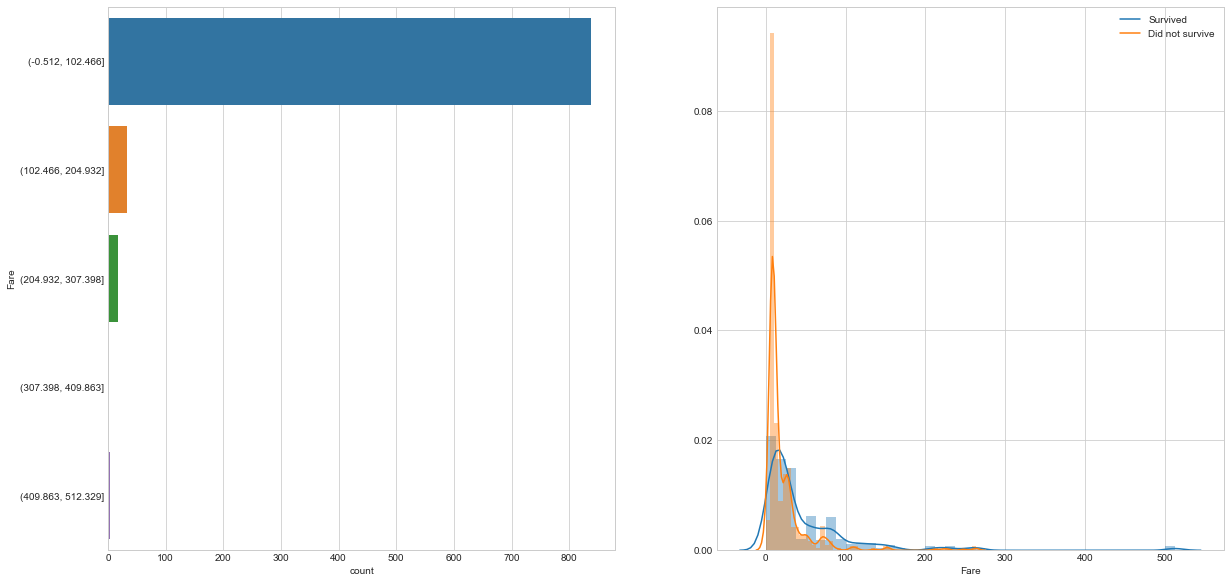

In [66]:
plot_count_dist(data=train_df,bin_df=df_cat,label_column='Survived', target_column='Fare', figsize=(20,10), use_bin_df=True)

##### 10.Cabin

In [64]:
#it has many missing values as shown in missingno matrix
train_df.Cabin.isnull().sum()

687

In [65]:
#Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

##### 11.Embarked

In [67]:
#there were only 2 lines in missingno matrix so only 2 missing values but let's confirm
train_df.Embarked.isnull().sum()

2

In [68]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

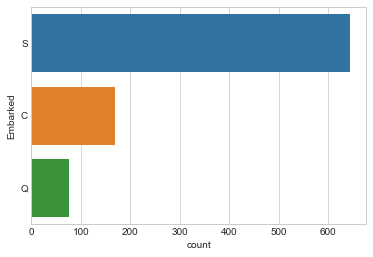

In [69]:
sns.countplot(y='Embarked', data=train_df);

In [70]:
df_cat['Embarked'] = train_df['Embarked']
df_con['Embarked'] = train_df['Embarked']

In [111]:
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_cat.dropna(subset=['Embarked'])